# Seaborn 
- 시각화 라이브러리

In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [4]:
import seaborn as sn

In [1]:
import seaborn as sns
tips_df = sns.load_dataset("tips")
tips_df

# 여러분이 돈을 벌어야 해요. 많이 벌고 싶어요. 나는 학생이야.
# 팁을 좀 많이 받고 싶은데... 사장님이 데이터 주면서 => 언제 일하고 싶니?
# 나의 목표: 팁을 많이 받는 것.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
# 처음에 여러분은 뭘 해야하죠? 분석하기 위해서
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [3]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [2]:
tips_df.shape

(244, 7)

In [13]:
tips_df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [14]:
tips_df.index

RangeIndex(start=0, stop=244, step=1)

<Axes: >

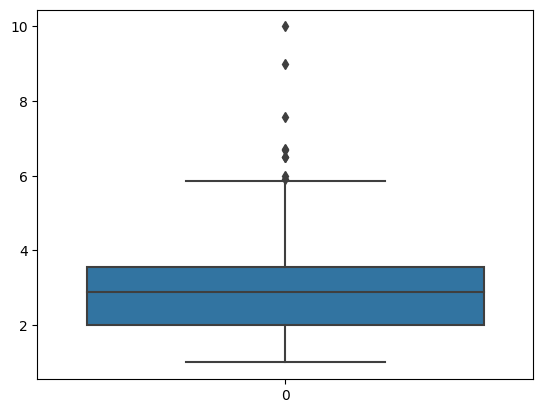

In [4]:
sns.boxplot(tips_df['tip'])

<Axes: xlabel='day', ylabel='total_bill'>

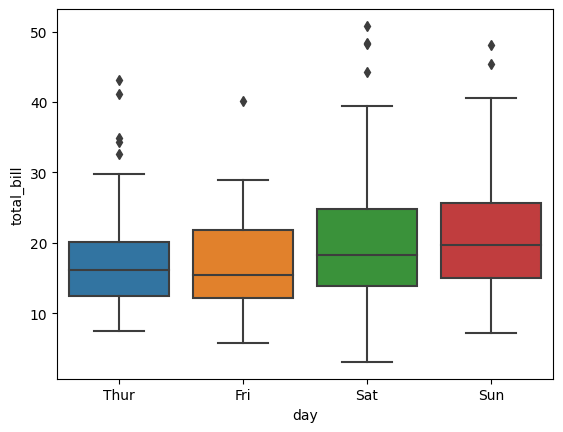

In [5]:
# total_bill이 높을 수록 => tip도 많이 받을 가능성이 높다.
# -total_bill이 높게 나오는 (1) 요일 (2) 성별 (3) 흡연여부

# 어느 요일에 매출이 잘 나올까?
sns.boxplot(x='day', y='total_bill', data=tips_df)

<Axes: xlabel='day', ylabel='total_bill'>

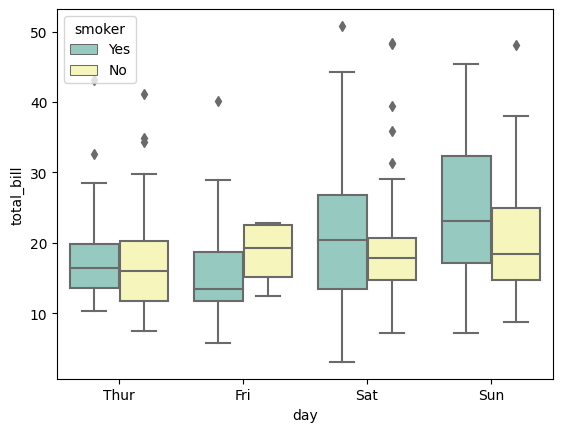

In [19]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue="smoker", palette="Set3")

<Axes: xlabel='day', ylabel='total_bill'>

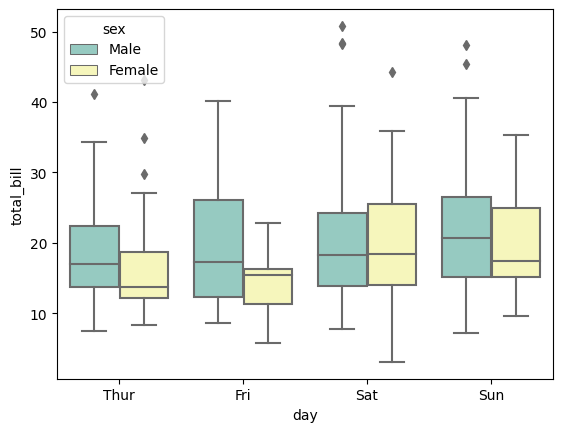

In [20]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue="sex", palette="Set3")

<Axes: xlabel='day', ylabel='total_bill'>

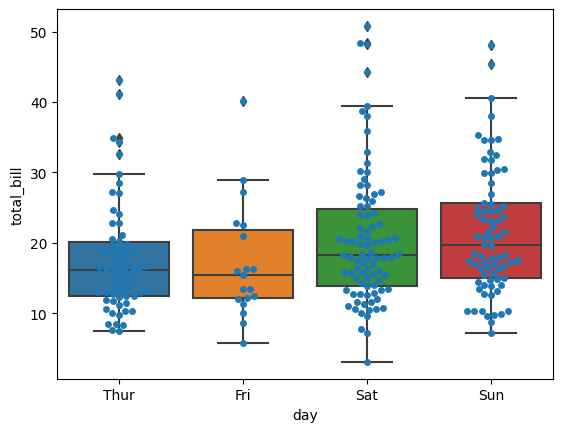

In [6]:
sns.boxplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(data=tips_df, x='day', y='total_bill')

### Lmplot(Linear Model Plot)

- 컬럼들간의 선형, 상관관계를 확인할 수 있는 그래프 

*회귀분석(Regression Analysis)
- 독립변인이 종속변인에 영향을 미치는지 알아보고자 할 때 실시하는 분석 방법

*상관관계

- -1~1 사이의 값을 갖는데요. 0 에 가까울 수록 두 변수는 관계가 없음을 나타냅니다.


ex) 

-    키와 몸무게는 상관관계가 있는가 => 키가 클수록 몸무게도 많이 나가는가? => 1에 가까운 모습을 보여주곘죠.
- 한달에 읽는 책 권수와 경제적 자유는 상관관계인가? -> KB금융 부자 리포트
- MBTI와 부자가 되는 것은 관계가 있는가?
- 테이블 전체 계싼 금액이 높을수록 -> 팁도 많이 내는가? 








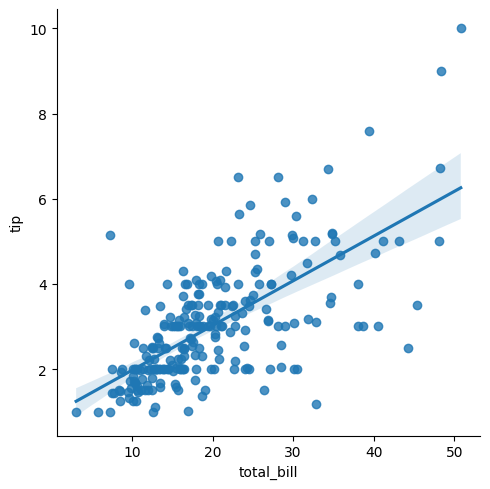

In [10]:
sns.lmplot(data=tips_df, x='total_bill', y='tip')  #y값이 종속변수가 되는 것이다. 

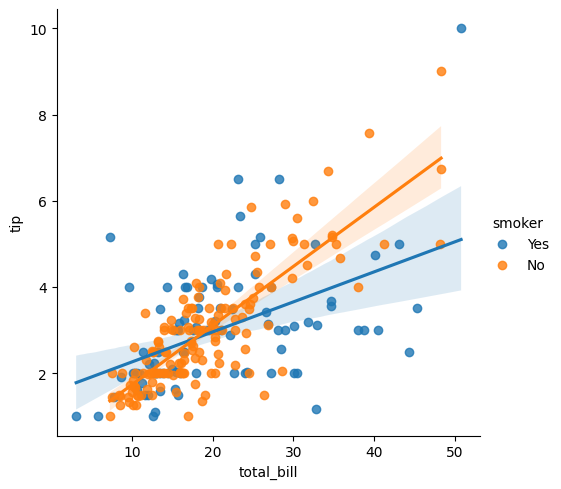

In [9]:
sns.lmplot(data=tips_df, x='total_bill', y='tip', hue='smoker')  #y값이 종속변수가 되는 것이다. 


# hue는 Seaborn의 plotting 함수에서 이용되는 파라미터 중 하나이며, 
# 데이터셋에서 범주형 변수를 기준으로 데이터 포인트를 그룹화하여 시각적으로 구분할 수 있게 해줍니다.

# 예를 들어, 식당 계산서 데이터셋에서 총 계산 금액과 팁 금액 간의 관계를 시각화하고자 할 때, 
# 흡연자와 비흡연자 데이터 포인트를 색상을 다르게 표시하여 구분할 수 있습니다. 
# 이를 위해 hue 파라미터에 'smoker' 변수를 입력하여 사용할 수 있습니다.

# 이렇게 hue 파라미터를 이용하여 범주형 변수를 기준으로 데이터 포인트를 시각적으로 구분할 수 있어, 
# 그룹별로 데이터의 관계를 쉽게 파악할 수 있게 됩니다.

# 따라서, hue는 Seaborn의 plotting 함수에서 유용한 파라미터 중 하나로, 
# 데이터의 그룹별 차이를 쉽게 확인할 수 있도록 도와줍니다.


# 비행기


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [31]:
flights = sns.load_dataset('flights')

flights = flights.pivot(index='month', columns='year', values='passengers')

flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

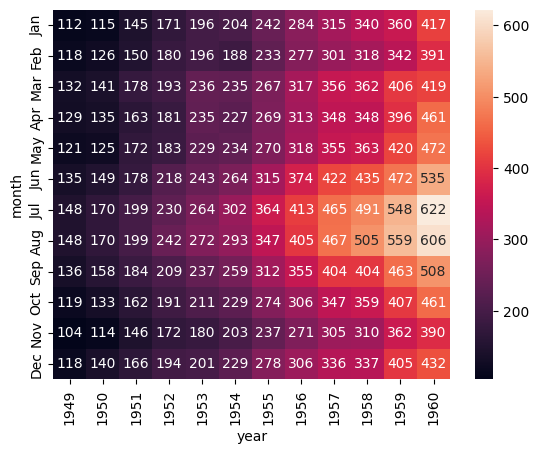

In [32]:
sns.heatmap(flights, annot=True, fmt='d')


#annot은 heatmap의 각 cell에 값을 표시할지 여부를 결정하는 매개변수입니다. 
# 기본값은 False이며, 만약 True로 설정되면 각 cell에 해당 값이 표시됩니다.

# fmt은 annot 옵션에서 사용되며, 어노테이션(annotation)의 형식을 지정합니다. 
# fmt 옵션을 사용하면 어노테이션 값의 형식을 문자열로 지정할 수 있습니다. d는 10진수(decimal) 형식을 의미하며, 
# 여기서는 숫자 형태의 값들을 정수로 표시하도록 지정한 것입니다. 따라서 fmt='d'는 히트맵에서 어노테이션 값으로 정수 형식을 사용하도록 지정한 것입니다.



### pairplot

- 각 컬럼(열)들 간의 상관 관계를 출력

In [33]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


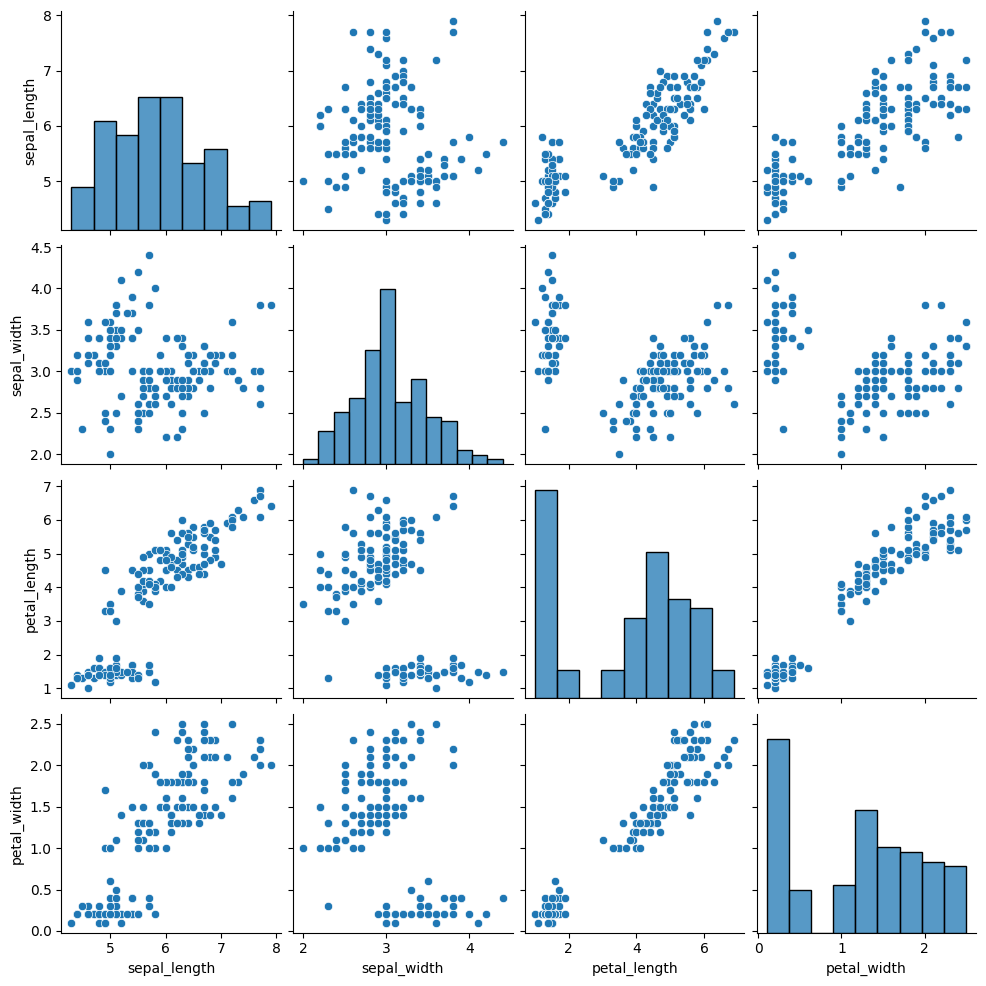

In [34]:
sns.pairplot(iris)

#상관관계를 계산할 수 있는 것들만 데이터를 보여준다. 

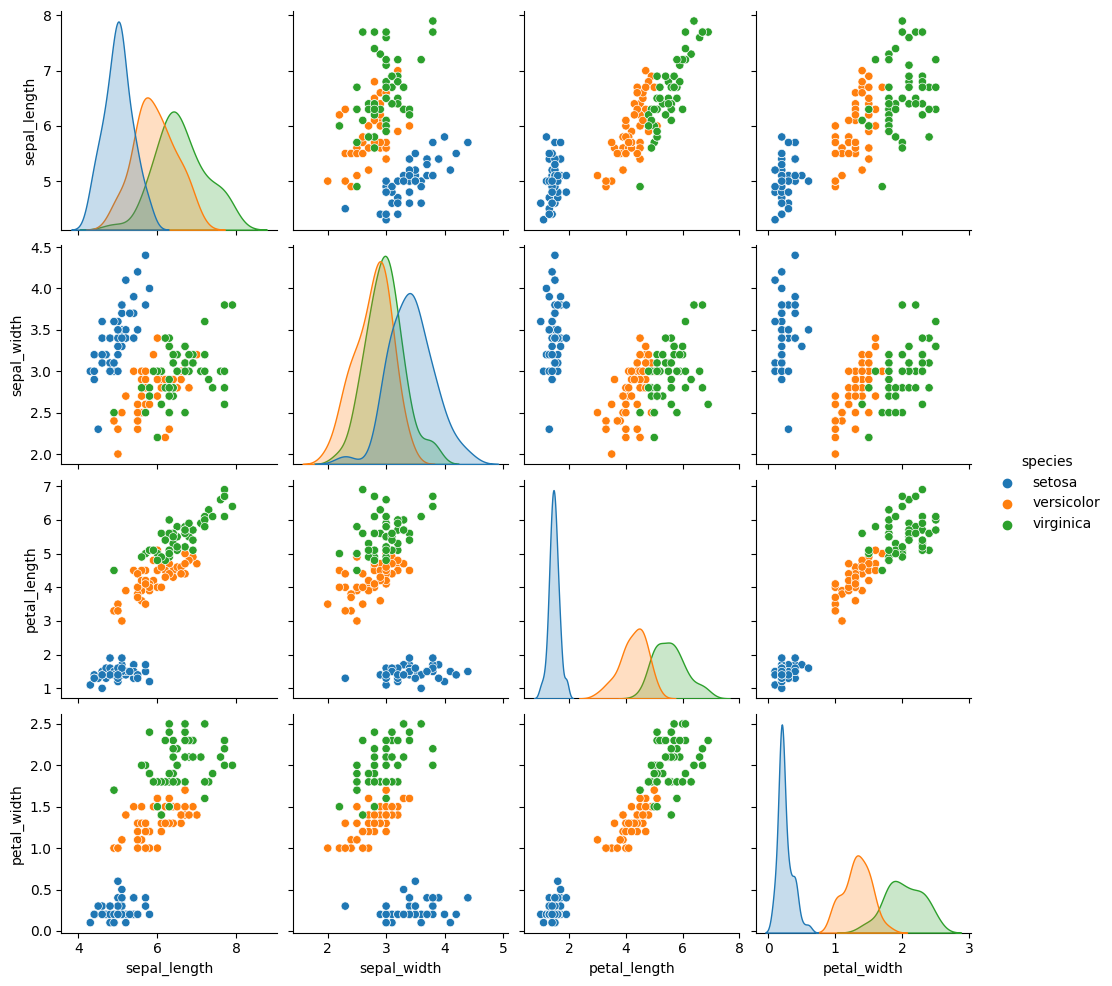

In [36]:
sns.pairplot(iris, hue='species')

# pairplot 함수는 데이터프레임의 각 열들을 두 개씩 짝지어 산점도(scatter plot)를 그리고, 
# 대각선 위에는 각 열의 분포를 히스토그램(histogram)으로 나타내는 그래프를 그려주는 함수입니다. 
# 
# 
# 이를 통해 변수 간의 상관 관계나 분포를 한눈에 살펴볼 수 있습니다. 
# 
# 예를 들어, iris 데이터셋에서는 꽃받침 길이(sepal length), 꽃받침 폭(sepal width), 꽃잎 길이(petal length), 꽃잎 폭(petal width)의 네 가지 변수를 짝지어 
# 그래프를 그리고, 대각선 위에는 각 변수의 분포를 히스토그램으로 나타내주게 됩니다.







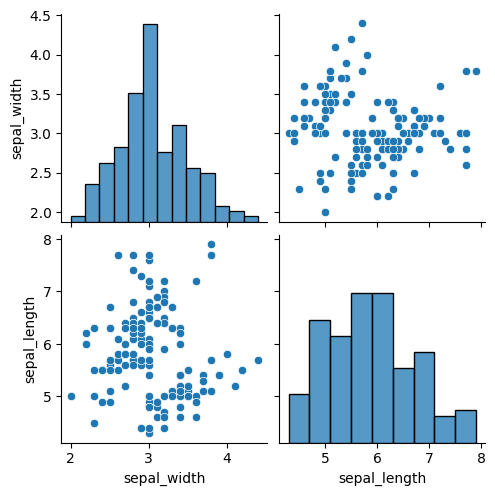

In [37]:
sns.pairplot(iris,vars=['sepal_width', 'sepal_length'])

In [38]:
iris.corr(numeric_only=True)


# iris.corr(numeric_only=True)는 iris 데이터프레임에서 숫자형 데이터만을 선택하여 상관관계(correlation) 행렬을 계산하는 함수입니다.
# 상관관계 행렬은 데이터프레임의 숫자형 열(변수) 간의 상관관계를 보여주는 행렬입니다. 
# 상관관계는 두 변수 간의 관계가 얼마나 강하고 양(+)의 방향성 또는 음(-)의 방향성을 가지는지를 나타내는 값으로, -1에서 1사이의 값을 가집니다. 
# 
# 1에 가까울수록 두 변수 간의 양(+)의 상관관계가 강하고, 
# -1에 가까울수록 음(-)의 상관관계가 강합니다. 0일 경우, 두 변수 간에 상관관계가 없다는 것을 의미합니다.


# numeric_only=True는 데이터프레임에서 숫자형 데이터만을 선택하도록 지정하는 옵션입니다. 
# 이 옵션을 사용하지 않으면, 문자형 데이터를 포함한 모든 데이터 열이 선택되어 상관관계 행렬을 계산하게 됩니다.




,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
# 두 변수가 양의 상관관계가 강하다는 것은, 한 변수의 값이 증가할 때 다른 변수의 값도 증가하는 경향이 있다는 것을 의미합니다. 
# 
# 
# 상관계수가 0.5 이상이면 강한 양의 상관관계가 있다고 판단할 수 있습니다. 
# 
# 예를 들어, 온도가 증가할 때 아이스크림 판매량도 증가하는 경우, 두 변수는 강한 양의 상관관계를 갖는다고 할 수 있습니다.


#고객 불만족이 올라갈수록 매출이 떨어진다. 음의 상관관계가 높다.








# Folium

- 지도 시각화 

In [40]:
!pip install folium

import folium

     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [42]:
folium.Map(location=[37.5488619, 127.1753687], zoom_start=15)

In [3]:
import pandas as pd


In [7]:
import pandas as pd

df = pd.read_csv('titanic.csv')
print(df)

     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\enter\AppData\Local\Temp\ipykernel_908\3113230484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=10)


<Axes: xlabel='Age', ylabel='Density'>

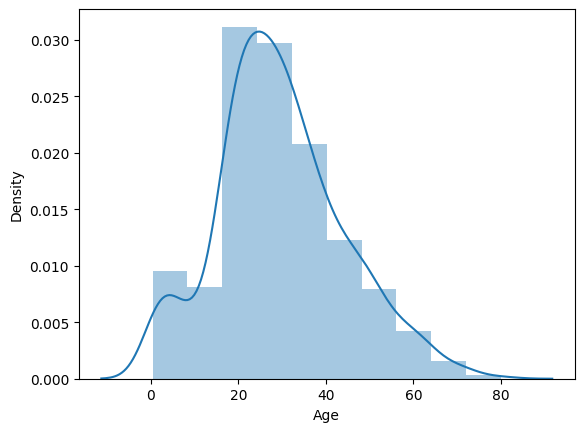

In [11]:
sns.distplot(df['Age'], bins=10)


# bins는 히스토그램을 만들 때 사용하는 옵션으로, 데이터를 몇 개의 구간(bins)으로 나눌지를 결정합니다. 
# bins=10은 Age 열의 값을 10개의 구간으로 나누어 히스토그램을 그리라는 의미입니다. 
# 구간이 많아지면 히스토그램이 더 세밀해지고, 구간이 적어지면 히스토그램이 덜 세밀해집니다.



<Axes: xlabel='Pclass', ylabel='count'>

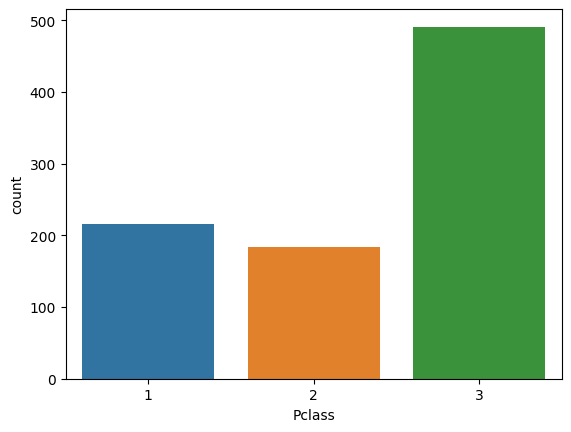

In [12]:
sns.countplot(x='Pclass',data=df)

# countplot은 Seaborn 라이브러리에서 제공하는 함수 중 하나로, 데이터프레임에서 각 카테고리 값이 몇 개씩 있는지를 막대 그래프로 보여줍니다.
# 위 코드에서는 df 데이터프레임에서 'Pclass' 열의 각 값(1, 2, 3 등급)이 몇 개씩 있는지 막대 그래프로 보여주고 있습니다.






<Axes: xlabel='Pclass', ylabel='Age'>

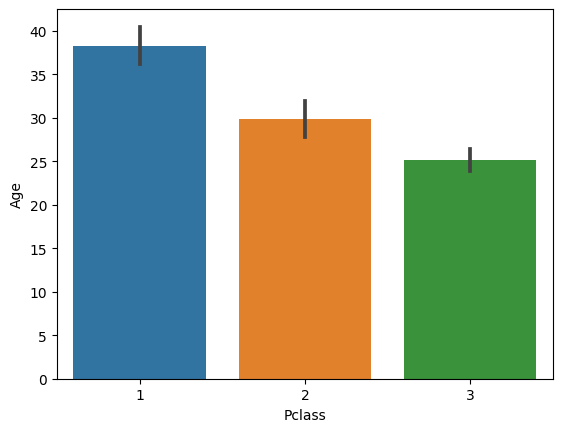

In [14]:
sns.barplot(x='Pclass', y='Age',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

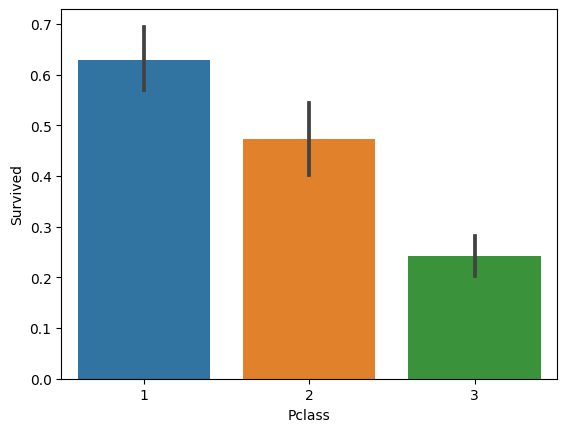

In [15]:
sns.barplot(x='Pclass', y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

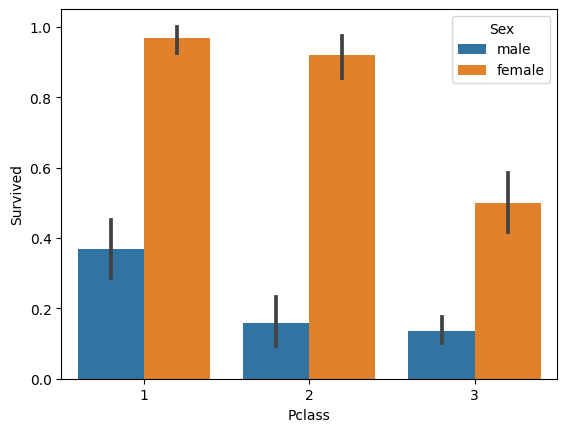

In [17]:
sns.barplot(x='Pclass',y='Survived', data=df, hue='Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

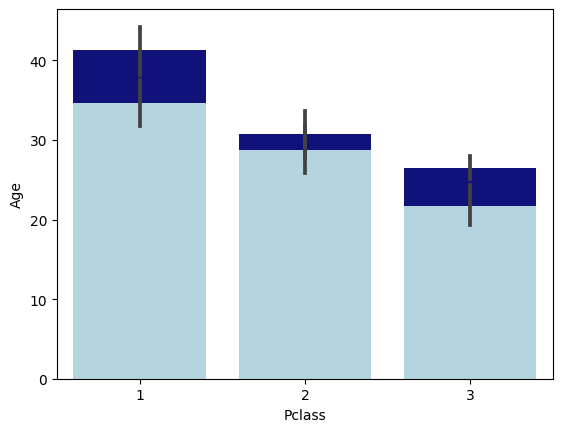

In [24]:
sns.barplot(x='Pclass', y='Age', data=df[df['Sex']=='male'], color='darkblue')
sns.barplot(x='Pclass', y='Age', data=df[df['Sex']=='female'], color='lightblue')

In [27]:
df['Age'].unique()

def set_age_category(age):
    category = "" 
    
    if age <= 15:
        category = "baby"      
    elif age <= 18:
        category = "student"
    elif age <= 25:
        category = "Young Adult"
    elif age <= 60:
        category = "adult" 
    else:
        category = "elder"
    return category



df['Age_Category'] = df['Age'].apply(lambda x : set_age_category(x))

In [ ]:
df[['Age', 'Age_Category']]

In [ ]:
sns.barplot(x='Age_Category', y="Survived", data=df)

<Axes: xlabel='Age_Category', ylabel='Survived'>

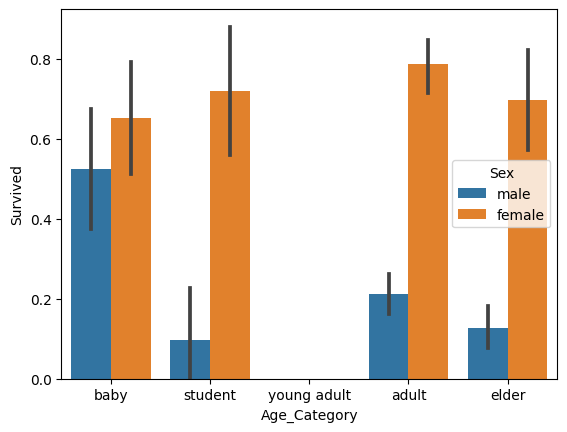

In [29]:
# sns.barplot(x='Age_Category', y="Survived", data=df, hue="Sex")
# 그래프에서 나이순으로 표현을 해주세요.

orders=['baby', 'student', 'young adult', 'adult', 'elder']
sns.barplot(data=df, x='Age_Category', y='Survived', hue='Sex', order=orders)

<Axes: xlabel='Sex', ylabel='Survived'>

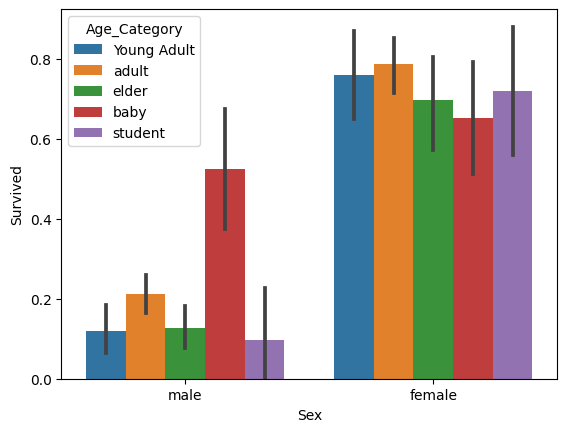

In [30]:

sns.barplot(x='Sex',y='Survived',data=df, hue='Age_Category')

In [ ]:
sns.violinplot()

<Axes: xlabel='Pclass', ylabel='Age'>

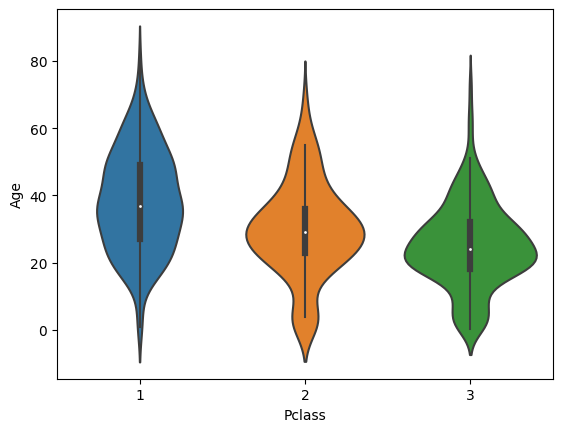

In [31]:
sns.violinplot(x='Pclass',y='Age', data=df)